# Simulering av terningkast
I dag skal  me simulera stokastiske forsøk. Me startar med terningkast

## Sannsynet for å trilla femmar
Kva er sannsynet for å trilla 5 på ein terning? 

In [16]:
# importerer dei biblioteka me treng
import random
import numpy as np

# Kor mange terningar me skal kasta
N = 100

# Tom liste som heiter terningkast
terningkast = []

# Legg til (append) antall auger på terningen i lista N gongar (antall kast)
for i in range(N):
    terningkast.append(random.randint(1,6))

# gjer om terningkast frå "liste" til "array"
terningkast = np.array(terningkast)

# finn antall element i lista som er 5
n = sum(terningkast == 5)

# reknar ut relativ frekvens
relativ_frekvens = n/N

# skriv ut resultatet
print("Kast:", N)
print("Femmarar:", n)
print("Relativ frekvens:", relativ_frekvens)

Kast: 100
Femmarar: 21
Relativ frekvens: 0.21


## Feilmargin

Me simulerer eit stokastisk forsøk $N$ gongar og finn den relative frekvensen $r = \frac{n}{N}$ for ei hending $A$. 

Då er $P(A)\approx r$, og feilmarginen er  $$2\cdot \sqrt{\frac{r(1-r)}{N}}$$

### Resulat av køyring (ca. 10 min)
100 000 000 terningar resulterte i relativ frekvens på 0.16664166 som er ganske nær teoretisk sannsyn på $\frac{1}{6}$

In [17]:
r = 0.21
N = 100
feil = 1.96*np.sqrt((r*(1-r))/N)

print("P(A) =", round(r, 6), "±", round(feil,6))
print("Altså er P(A) mellom", round(r-feil, 6), "og", round(r+feil,6))

P(A) = 0.21 ± 0.079832
Altså er P(A) mellom 0.130168 og 0.289832


In [2]:
r = 0.16664166
N = 100000000
feil = 1.96*np.sqrt((r*(1-r))/N)

print("P(A) =", round(r, 6), "±", round(feil,6))
print("Altså er P(A) mellom", round(r-feil, 6), "og", round(r+feil,6))

P(A) = 0.166642 ± 7.3e-05
Altså er P(A) mellom 0.166569 og 0.166715


## Trilling og plotting

Trillar terningar og plottar samanhengen mellom antall kast ($N$) og (kumulativ) relativ frekvens. 

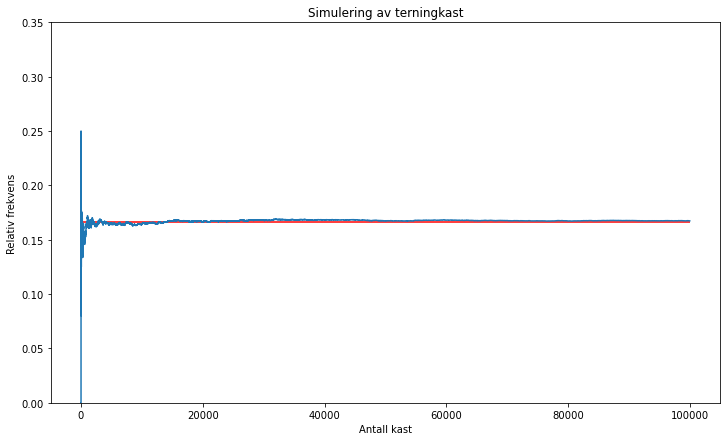

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

antall_kast = 100000
terningkast = []

for i in range(antall_kast):
    terningkast.append(random.randint(1,6))

terningkast = np.array(terningkast)
n = np.cumsum(terningkast == 5)      # kumulativ sum (antall 5-arar til no)
N = np.arange(1, antall_kast + 1)
rel_frek = n/N

plt.figure(figsize = (12,7))         # bestemmer figurstørrelsen (12 brei og 7 høg)
plt.hlines(1/6, 0, antall_kast, 'r') # horisontal linje, y=1/6, startar i x=0 og sluttar i x=antall kast, 'r' -> raud
plt.plot(N, rel_frek)                # N på x-aksen og relativ frekvens på y-aksen
plt.xlabel("Antall kast")
plt.ylabel("Relativ frekvens")
plt.ylim(0,0.35)
plt.title("Simulering av terningkast")
plt.show()